# Drom.ru

## Предварительныя обработка

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')  # стиль для графиков

import seaborn as sns

In [164]:
df = pd.read_csv("auto_data.csv", encoding = "cp1251", sep=';', comment='#')
df.head()

,Auto_Name,Year,Auto_URL,Price,Fuel,HorsePower,Mileage
0,Лада 2107,2008,https://pushkino.drom.ru/lada/2107/50899875.html,45000,бензин,76,55858
1,Москвич 403,1963,https://moscow.drom.ru/moskvitch/403/50130207....,47000,бензин,45,25380
2,Лада 2105,2003,https://moscow.drom.ru/lada/2105/50918627.html,47000,бензин,71,50000
3,Лада 2115 Самара,2003,https://chehov.drom.ru/lada/2115/50146925.html,49000,бензин,76,200000
4,Лада 21099,2002,https://korolev.drom.ru/lada/21099/50913242.html,50000,бензин,78,145000


### Сведение о данных в таблице

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Auto_Name    943 non-null    object
 1   Year         943 non-null    int64 
 2   Auto_URL     943 non-null    object
 3   Price        943 non-null    int64 
 4   Fuel         943 non-null    object
 5   HorsePower   943 non-null    int64 
 6   Mileage      943 non-null    int64 
 7   MileageType  943 non-null    object
dtypes: int64(4), object(4)
memory usage: 59.1+ KB


### Базовая статистическая информация

In [178]:
df.describe(include=np.object)

/var/folders/25/9c1rc1w11vs_h2dd6hy7vt7h0000gn/T/ipykernel_60830/3211851552.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=np.object)


,Auto_Name,Auto_URL,Fuel,MileageType
count,943,943,943,943
unique,169,943,2,1
top,Volkswagen Polo,https://pushkino.drom.ru/lada/2107/50899875.html,бензин,C пробегом по РФ
freq,63,1,881,943


In [179]:
df.describe()

,Year,Price,HorsePower,Mileage
count,943.000000,9.430000e+02,943.000000,943.000000
mean,2012.539767,1.626419e+06,168.373277,138167.758218
std,7.925091,1.894003e+06,86.208756,97657.341269
min,1952.000000,4.500000e+04,45.000000,13.000000
25%,2008.000000,5.820000e+05,110.000000,72559.000000
50%,2014.000000,1.199000e+06,150.000000,119788.000000
75%,2019.000000,1.950000e+06,194.000000,188050.000000
max,2023.000000,2.450000e+07,625.000000,999999.000000


### Типы данных в каждом из столбцов

In [167]:
df.dtypes

Auto_Name     object
Year           int64
Auto_URL      object
Price          int64
Fuel          object
HorsePower     int64
Mileage       object
dtype: object

### Информация о пропусках в каждом из столбцов

In [166]:
df.isnull().sum()

Auto_Name     0
Year          0
Auto_URL      0
Price         0
Fuel          0
HorsePower    0
Mileage       0
dtype: int64

### Mileage - Пробег нужно перевести в тип данных int64, на данный момент он в статусе object из за строк где есть записи типа: "хххх,безпробегапоРФ". На основе этого поля можно создать новый признак с информацией о пробеге в РФ или нет

In [170]:
df['MileageType'] = np.where('безпробегапоРФ' in df['Mileage'], 'Без пробега по РФ', 'C пробегом по РФ')

In [171]:
df.head()

,Auto_Name,Year,Auto_URL,Price,Fuel,HorsePower,Mileage,MileageType
0,Лада 2107,2008,https://pushkino.drom.ru/lada/2107/50899875.html,45000,бензин,76,55858,C пробегом по РФ
1,Москвич 403,1963,https://moscow.drom.ru/moskvitch/403/50130207....,47000,бензин,45,25380,C пробегом по РФ
2,Лада 2105,2003,https://moscow.drom.ru/lada/2105/50918627.html,47000,бензин,71,50000,C пробегом по РФ
3,Лада 2115 Самара,2003,https://chehov.drom.ru/lada/2115/50146925.html,49000,бензин,76,200000,C пробегом по РФ
4,Лада 21099,2002,https://korolev.drom.ru/lada/21099/50913242.html,50000,бензин,78,145000,C пробегом по РФ


### Удаляем хвосты с, без пробега по РФ и переводим в в тип int64

In [172]:
df.shape

(943, 8)

In [173]:
df['Mileage'] = df['Mileage'].str.replace(',безпробегапоРФ', '')

In [174]:
df.head()

,Auto_Name,Year,Auto_URL,Price,Fuel,HorsePower,Mileage,MileageType
0,Лада 2107,2008,https://pushkino.drom.ru/lada/2107/50899875.html,45000,бензин,76,55858,C пробегом по РФ
1,Москвич 403,1963,https://moscow.drom.ru/moskvitch/403/50130207....,47000,бензин,45,25380,C пробегом по РФ
2,Лада 2105,2003,https://moscow.drom.ru/lada/2105/50918627.html,47000,бензин,71,50000,C пробегом по РФ
3,Лада 2115 Самара,2003,https://chehov.drom.ru/lada/2115/50146925.html,49000,бензин,76,200000,C пробегом по РФ
4,Лада 21099,2002,https://korolev.drom.ru/lada/21099/50913242.html,50000,бензин,78,145000,C пробегом по РФ


In [175]:
df['Mileage'] = df['Mileage'].astype('int64')

In [176]:
df.head()

,Auto_Name,Year,Auto_URL,Price,Fuel,HorsePower,Mileage,MileageType
0,Лада 2107,2008,https://pushkino.drom.ru/lada/2107/50899875.html,45000,бензин,76,55858,C пробегом по РФ
1,Москвич 403,1963,https://moscow.drom.ru/moskvitch/403/50130207....,47000,бензин,45,25380,C пробегом по РФ
2,Лада 2105,2003,https://moscow.drom.ru/lada/2105/50918627.html,47000,бензин,71,50000,C пробегом по РФ
3,Лада 2115 Самара,2003,https://chehov.drom.ru/lada/2115/50146925.html,49000,бензин,76,200000,C пробегом по РФ
4,Лада 21099,2002,https://korolev.drom.ru/lada/21099/50913242.html,50000,бензин,78,145000,C пробегом по РФ


## Визуальный анализ

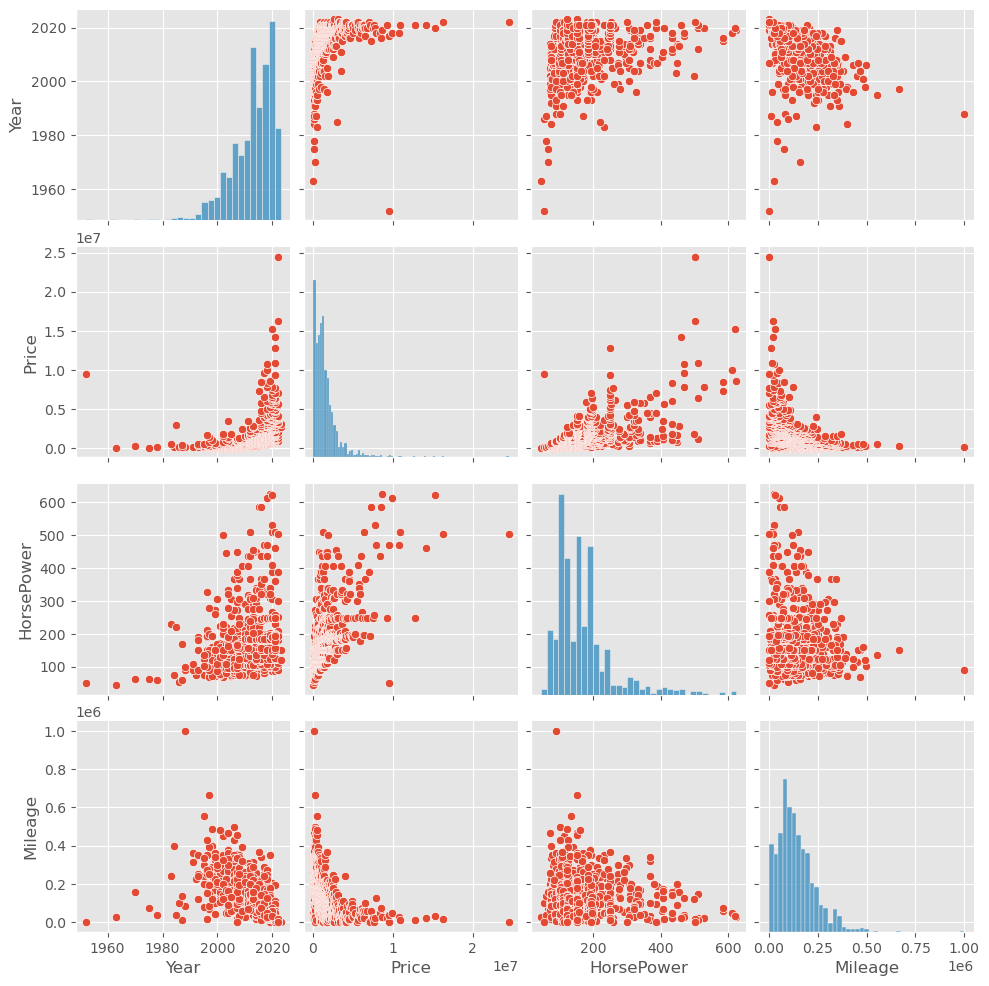

In [184]:
sns.pairplot(df)

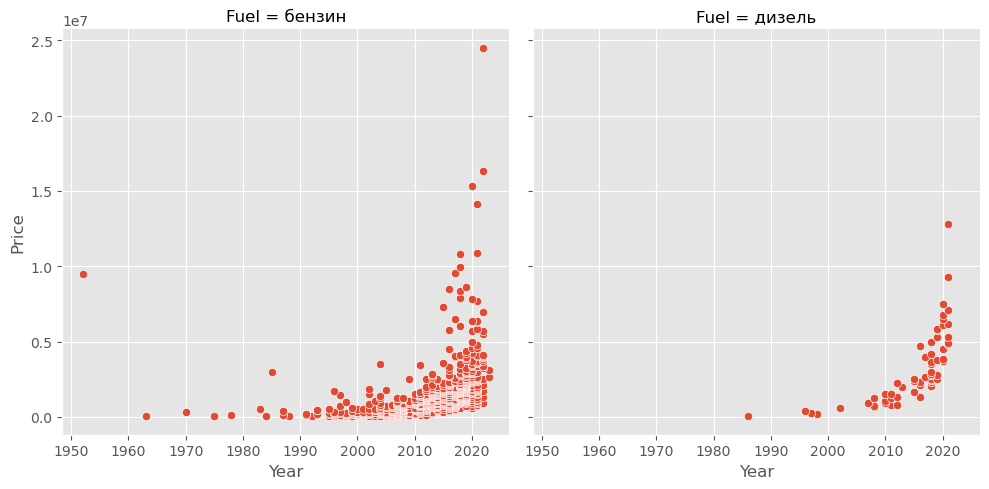

In [208]:
sns.relplot(x='Year', y ='Price', col='Fuel', data=df)

#### На рисунках выше изображены две точечной диаграммы зависимости год от цены для машин с бензином и дизелем соответственно. Резкий рост цены заметен для машин возрастом пару лет. Чем старше машина, тем она дешевле. Естественно есть выбросы. Возможно, это винтажные модели.

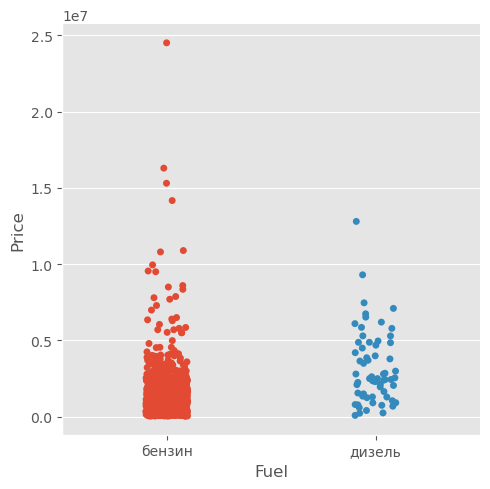

In [183]:
sns.catplot(x='Fuel',
            y='Price',
            data=df);

#### Большая часть машин пользуются бензиновым топливом и в цене сконцентрированы до 5.000.000 рублей. Количество машин с бензином гораздо меньше

In [189]:
df['Fuel']=df['Fuel'].astype('category')
df.dtypes

Auto_Name        object
Year              int64
Auto_URL         object
Price             int64
Fuel           category
HorsePower        int64
Mileage           int64
MileageType      object
dtype: object

In [190]:
df['Fuel_cat']=df['Fuel'].cat.codes
df.head()

,Auto_Name,Year,Auto_URL,Price,Fuel,HorsePower,Mileage,MileageType,Fuel_cat
0,Лада 2107,2008,https://pushkino.drom.ru/lada/2107/50899875.html,45000,бензин,76,55858,C пробегом по РФ,0
1,Москвич 403,1963,https://moscow.drom.ru/moskvitch/403/50130207....,47000,бензин,45,25380,C пробегом по РФ,0
2,Лада 2105,2003,https://moscow.drom.ru/lada/2105/50918627.html,47000,бензин,71,50000,C пробегом по РФ,0
3,Лада 2115 Самара,2003,https://chehov.drom.ru/lada/2115/50146925.html,49000,бензин,76,200000,C пробегом по РФ,0
4,Лада 21099,2002,https://korolev.drom.ru/lada/21099/50913242.html,50000,бензин,78,145000,C пробегом по РФ,0


<AxesSubplot:>

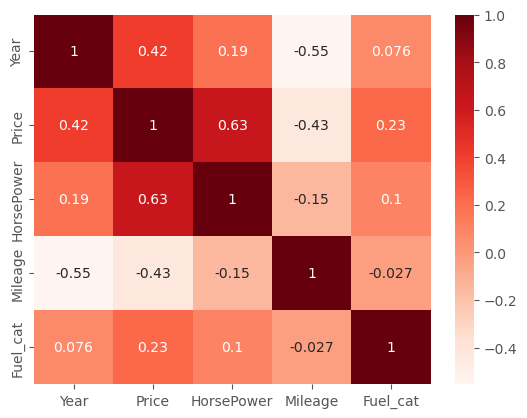

In [191]:
sns.heatmap(df.corr(), annot=True, cmap = 'Reds')

#### Самая большая корреляция наблюдается у Цены с Количеством лошадиных сил. 

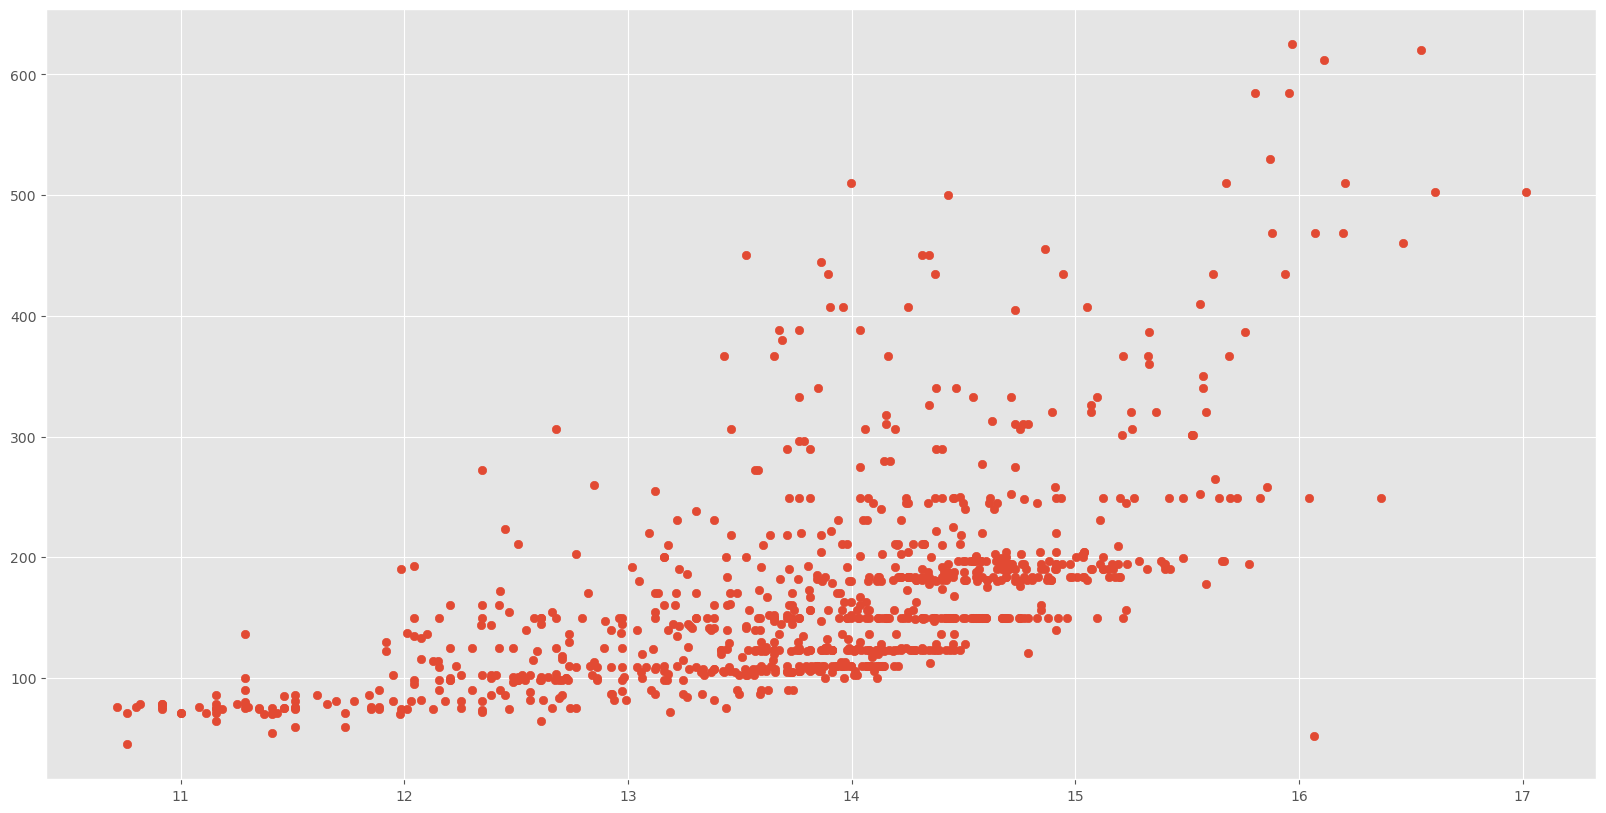

In [206]:
plt.figure(figsize = (20, 10))
plt.scatter(np.log(df.Price), df.HorsePower)
plt.show()

#### Как мы видим, зависимость есть, но она очень маленькая. Чем больше лошадиных сил, тем больше цена и разброс

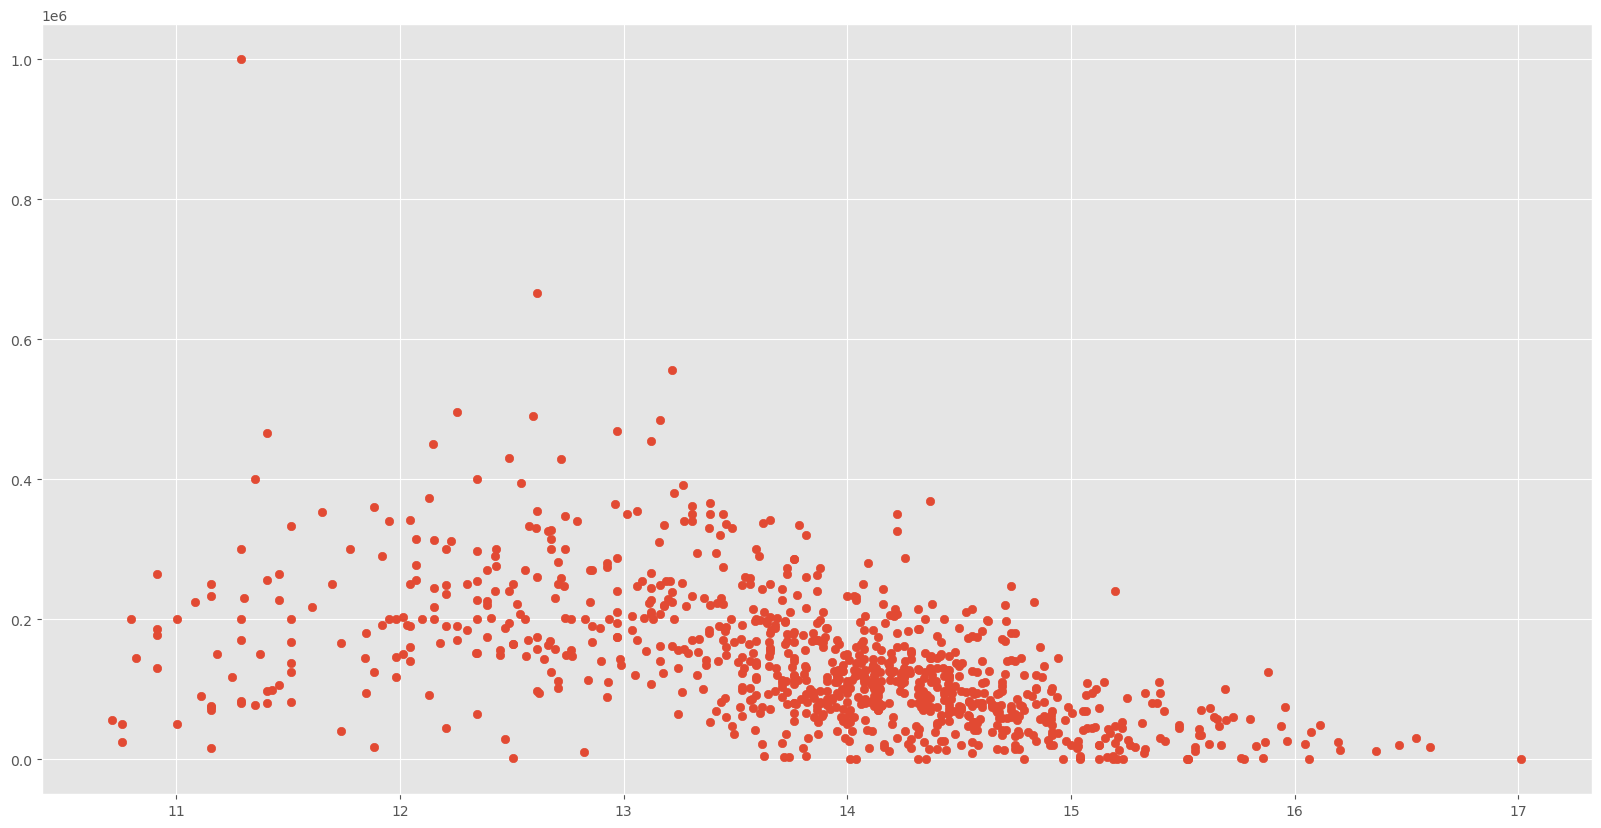

In [205]:
plt.figure(figsize = (20, 10))
plt.scatter(np.log(df.Price), df.Mileage)
plt.show()

#### В то время как данный график показывает скорее отрицательную маленькую зависимость цены от километража.

(array([  7.,  97., 170., 129., 155., 106., 107.,  28.,  48.,  10.,   9.,
         21.,  10.,   8.,   6.,   6.,   5.,   6.,   3.,   3.,   4.,   0.,
          0.,   2.,   3.]),
 array([ 45. ,  68.2,  91.4, 114.6, 137.8, 161. , 184.2, 207.4, 230.6,
        253.8, 277. , 300.2, 323.4, 346.6, 369.8, 393. , 416.2, 439.4,
        462.6, 485.8, 509. , 532.2, 555.4, 578.6, 601.8, 625. ]),
 <BarContainer object of 25 artists>)

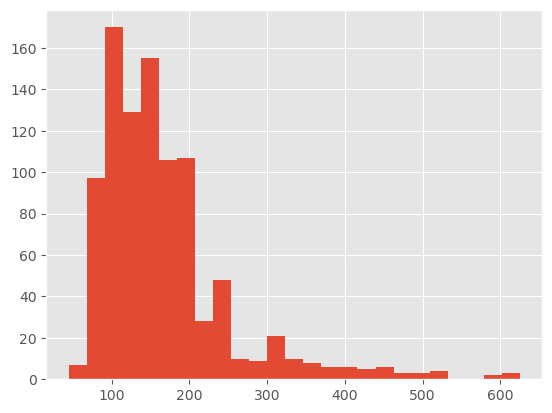

In [204]:
plt.hist(df['HorsePower'], bins = 25)

#### Из гистограммы выше можно сделать вывод, что основная часть машин имеет в районе 100-150 лошадиных сил

(array([ 99., 112., 176., 146., 107., 109.,  59.,  48.,  30.,  14.,  24.,
          7.,   2.,   3.,   4.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.30000000e+01, 3.33458667e+04, 6.66787333e+04, 1.00011600e+05,
        1.33344467e+05, 1.66677333e+05, 2.00010200e+05, 2.33343067e+05,
        2.66675933e+05, 3.00008800e+05, 3.33341667e+05, 3.66674533e+05,
        4.00007400e+05, 4.33340267e+05, 4.66673133e+05, 5.00006000e+05,
        5.33338867e+05, 5.66671733e+05, 6.00004600e+05, 6.33337467e+05,
        6.66670333e+05, 7.00003200e+05, 7.33336067e+05, 7.66668933e+05,
        8.00001800e+05, 8.33334667e+05, 8.66667533e+05, 9.00000400e+05,
        9.33333267e+05, 9.66666133e+05, 9.99999000e+05]),
 <BarContainer object of 30 artists>)

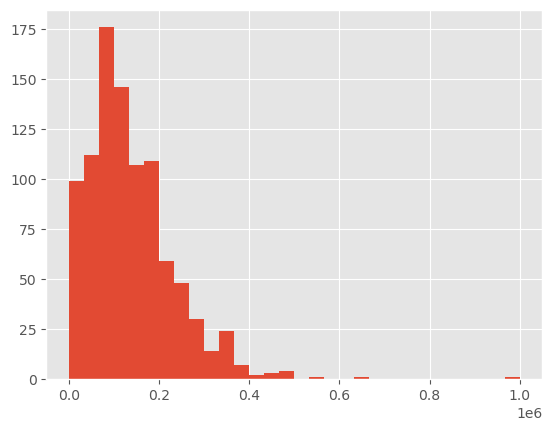

In [193]:
plt.hist(df['Mileage'], bins = 30)

#### При этом основная концентрация машин имеет пробег в районе 100.000 км

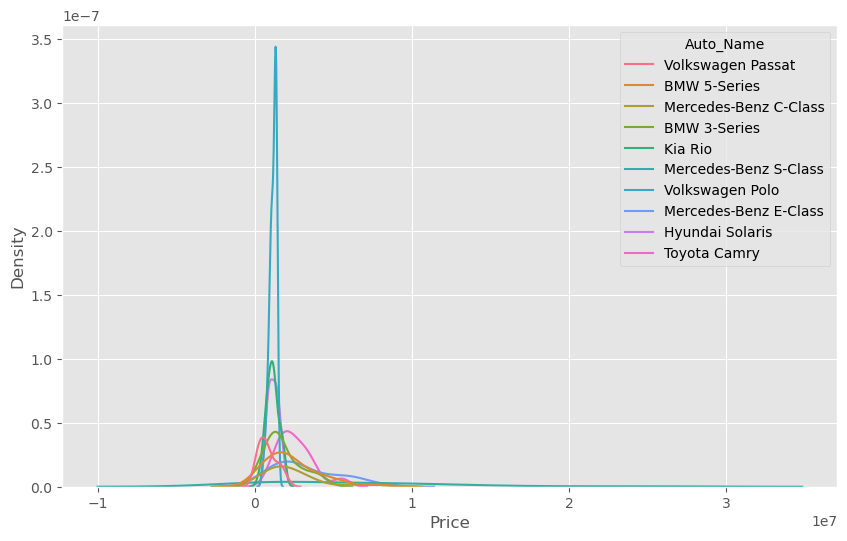

In [195]:
top = df.groupby('Auto_Name').Price.count().nlargest(10)
top = pd.DataFrame(data = top)
top = top.reset_index()
top = list(top['Auto_Name'])
top = df[df['Auto_Name'].isin(top)]
sns_plot = sns.kdeplot(data=top, x='Price', hue='Auto_Name')
fig = sns_plot.get_figure()
fig.set_figheight(6)
fig.set_figwidth(10)

#### Этот же график показывает топ 10 самых дорогих марок машин. Видно, что сильно лидирует Mercedes-Benz E-class

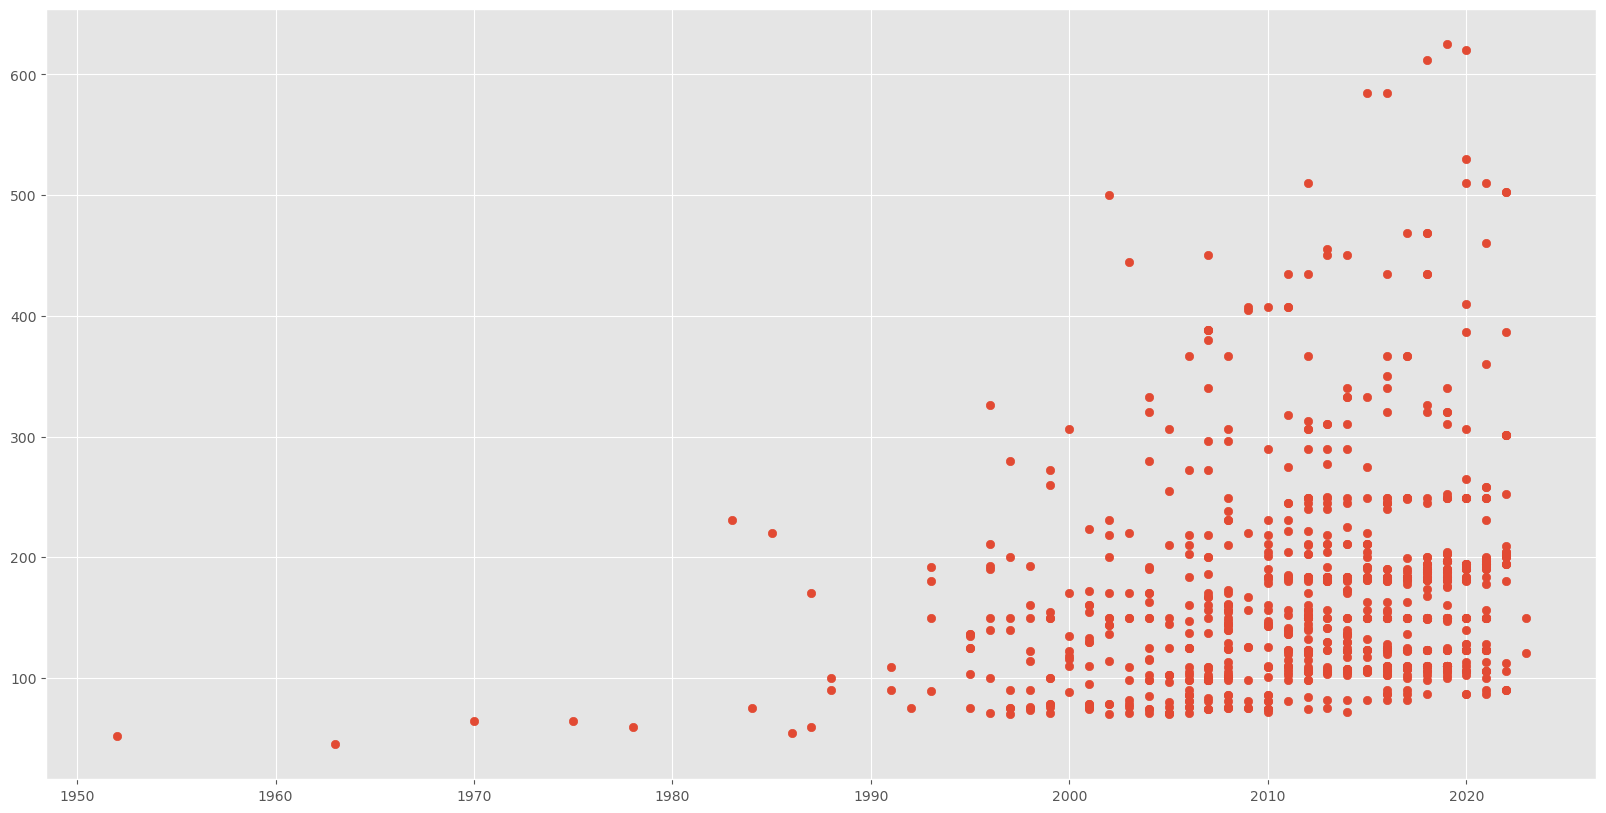

In [224]:
plt.figure(figsize = (20, 10))
plt.scatter( df.Year, df.HorsePower)
plt.show()

### Добавление нового признака страна производства: Manufacturer

In [196]:
brands = []
for name in df['Auto_Name'].unique():
    brands.append(name.split()[0])
brands = set(brands)
brands = list(brands)

In [197]:
brands_dict = {'Лада': 'Russia', 'Infiniti': 'Japan','Mitsubishi': 'Japan','Jaguar' : 'UK','Mercedes-Benz': 'Germany','Volvo': 'Sweden', 'Hyundai':'South Korea', 'Peugeot': 'France','Chrysler': 'USA','Lincoln': 'USA', 'Renault':'France', 'Honda': 'Japan','Genesis': 'South Korea','Cadillac': 'USA','Dodge': 'USA','Ravon': 'Uzbekistan', 'Lexus': 'Japan', 'Toyota': 'Japan', 'Audi': 'Germany','Chery': 'China', 'Mazda': 'Japan', 'Volkswagen': 'Germany', 'Jetta': 'China', 'Subaru':'Japan', 'Москвич':'Russia', 'Kia':'South Korea','Suzuki': 'Japan','Nissan':'Japan', 'Porsche': 'Germany','Chevrolet':'USA', 'BMW': 'Germany', 'Acura': 'Japan',  'Opel': 'Germany','Datsun': 'Japan', 'Citroen':'France', 'Ford':'USA', 'ЗАЗ':'Ukraine','ГАЗ': 'Russia'}

In [199]:
df['Manufacturer'] = ''
for i in range(len(df['Auto_Name'].values)):
    for brand in brands_dict.keys():
        if df['Auto_Name'].values[i].__contains__(brand) == True:
            df['Manufacturer'].values[i] = brands_dict.get(brand)

In [200]:
df.head()

,Auto_Name,Year,Auto_URL,Price,Fuel,HorsePower,Mileage,MileageType,Fuel_cat,Manufacturer
0,Лада 2107,2008,https://pushkino.drom.ru/lada/2107/50899875.html,45000,бензин,76,55858,C пробегом по РФ,0,Russia
1,Москвич 403,1963,https://moscow.drom.ru/moskvitch/403/50130207....,47000,бензин,45,25380,C пробегом по РФ,0,Russia
2,Лада 2105,2003,https://moscow.drom.ru/lada/2105/50918627.html,47000,бензин,71,50000,C пробегом по РФ,0,Russia
3,Лада 2115 Самара,2003,https://chehov.drom.ru/lada/2115/50146925.html,49000,бензин,76,200000,C пробегом по РФ,0,Russia
4,Лада 21099,2002,https://korolev.drom.ru/lada/21099/50913242.html,50000,бензин,78,145000,C пробегом по РФ,0,Russia


### Гипотеза о том, что немецкие машины в сумме цена*количество превышают остальные

In [236]:
country_cars = dict()
for elem in df['Manufacturer'].values:
    country_cars[elem] = np.log(df[df['Manufacturer']==elem]['Price'].sum()*len(df[df['Manufacturer']==elem]))

<BarContainer object of 12 artists>

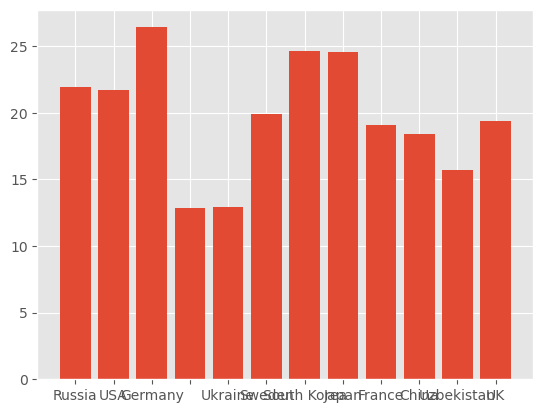

In [243]:
plt.bar(country_cars.keys(), country_cars.values())

In [248]:
df_country = pd.DataFrame({'country' : country_cars.keys(), 'values' : country_cars.values()})
df_country

,country,values
0,Russia,21.972247
1,USA,21.694208
2,Germany,26.424860
3,,12.821258
4,Ukraine,12.948010
5,Sweden,19.878474
6,South Korea,24.662641
7,Japan,24.563249
8,France,19.087689
9,China,18.417821


### Гипотеза о том, что чем больше лошадиные силы у машины, тем она дороже

In [255]:
np.correlate(df['Price'], df['HorsePower'])

array([354902767500])

In [254]:
np.corrcoef(df['Price'], df['HorsePower'])

array([[1.        , 0.62848166],
       [0.62848166, 1.        ]])

### Гипотеза о том, что средняя цена машин, произведенных в Корее равна средней цене машин, произведенных в Японии

In [261]:
ztest(df[df['Manufacturer']=='South Korea']['Price'], df[df['Manufacturer']=='Japan']['Price'], value = 0)

(0.15086146140703385, 0.8800850018151791)

##### Так как значение p-value больше 0.05, у нас нет оснований отвергнуть гипотезу

### Средняя цена бензиновых и дизельных машин одинакова

In [258]:
from statsmodels.stats.weightstats import ztest as ztest

In [260]:
ztest(df[df['Fuel']=='бензин']['Price'], df[df['Fuel']=='дизель']['Price'], value= 0)

(-7.15396323067869, 8.430765760960404e-13)

##### Так как значение p-value меньше 0.05, у нас есть основания отвергнуть гипотезу

### Машинное обучение

In [213]:
y=df['Price']
X=df.drop(['Price','Auto_Name','Auto_URL','Fuel_cat', 'Manufacturer'], axis=1)

X['Fuel'] = pd.factorize(X['Fuel'])[0]
X['MileageType'] = pd.factorize(X['MileageType'])[0]

In [214]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Year         943 non-null    int64
 1   Fuel         943 non-null    int64
 2   HorsePower   943 non-null    int64
 3   Mileage      943 non-null    int64
 4   MileageType  943 non-null    int64
dtypes: int64(5)
memory usage: 37.0 KB


In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

In [216]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dectree = DecisionTreeRegressor(max_depth=4, random_state=20)
dectree.fit(X_train,y_train)
dectree.score(X_test,y_test)

0.6153527307780454

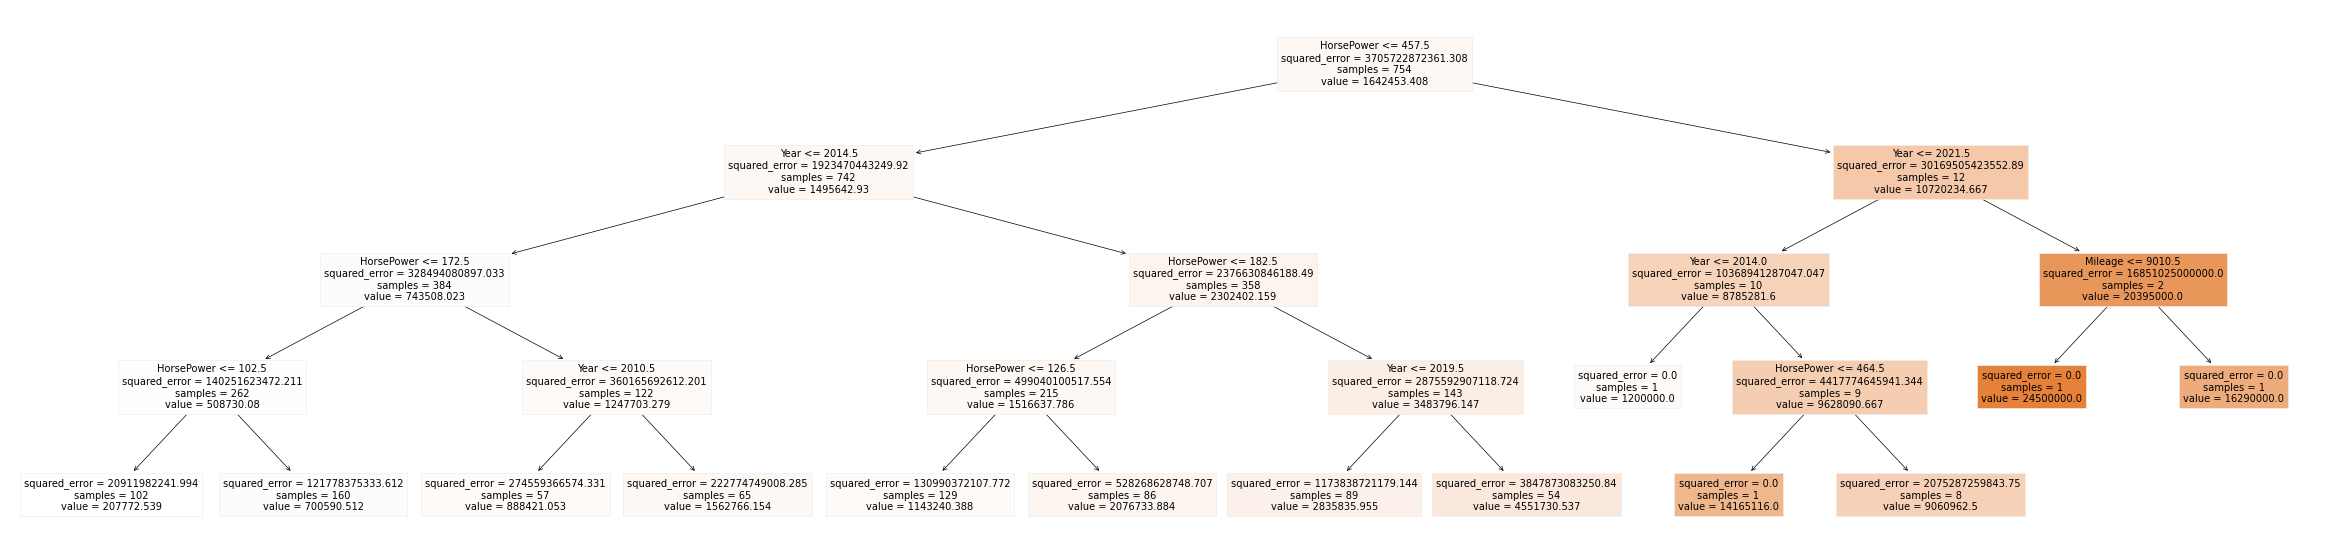

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=((30,7)))
plot_tree(dectree, 
          filled=True,
          feature_names=X.columns)
plt.show()

In [218]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators = 40, max_depth=4, random_state=21)
rfc.fit(X_train, y_train)
rfc.score (X_test, y_test)

0.6755036657192263

In [219]:
from sklearn.metrics import mean_absolute_error
y_pred=rfc.predict(X_test)
mean_absolute_error(y_test,y_pred)

420193.1604594975

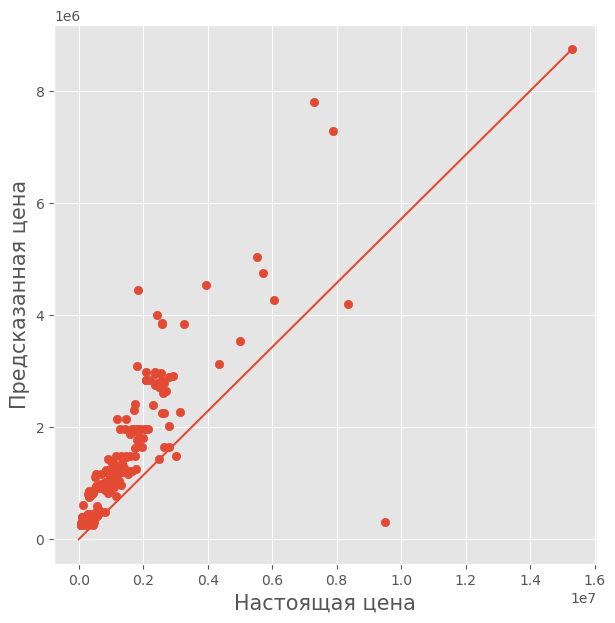

In [220]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test,y_pred) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(y_pred)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=15)
plt.ylabel('Предсказанная цена', fontsize=15);